# POD of flow past a 2D cylinder

This notebook has the function of getting used to read data from ModelFlows site and starting to write some code on fluid dynamics methods

## Data import and visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os 
import hdf5storage

data_path = './DATA'
Tensor = hdf5storage.loadmat(os.path.join(data_path, 'TensorRe100.mat'))['Tensor']
X = hdf5storage.loadmat(os.path.join(data_path,'X.mat'))['X']
Y = hdf5storage.loadmat(os.path.join(data_path,'Y.mat'))['Y']

(201, 651, 330)


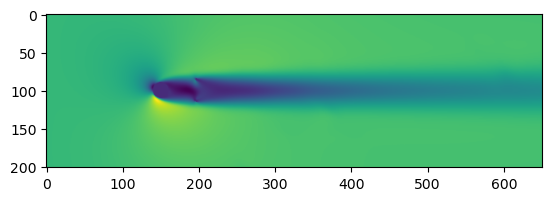

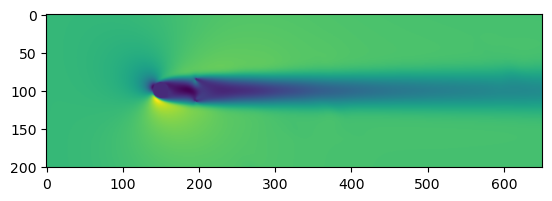

In [3]:

print(np.shape(Tensor[0]))

for i in range(10, 12):
    plt.figure()
    plt.imshow(Tensor[1, :, :, i] + Tensor[0, :, :, i])

In [4]:
flow_data = Tensor[0, :, :, 10:]
print(flow_data.shape)

(201, 651, 320)


## POD implementation

In [28]:
H, W, N = flow_data.shape
print(H, W, N)
X = flow_data.reshape(H*W, N)
X_mean = X.mean(axis=1, keepdims=True)
X_centered = X - X_mean


201 651 320


In [31]:
U, S, VT = np.linalg.svd(X_centered, full_matrices=False)

In [48]:
total_energy = np.sum(S**2)
cumulative_energy = np.cumsum(S**2)
threshold = 0.9 * total_energy
num_modes = np.searchsorted(cumulative_energy, threshold) + 1
print(num_modes)

4


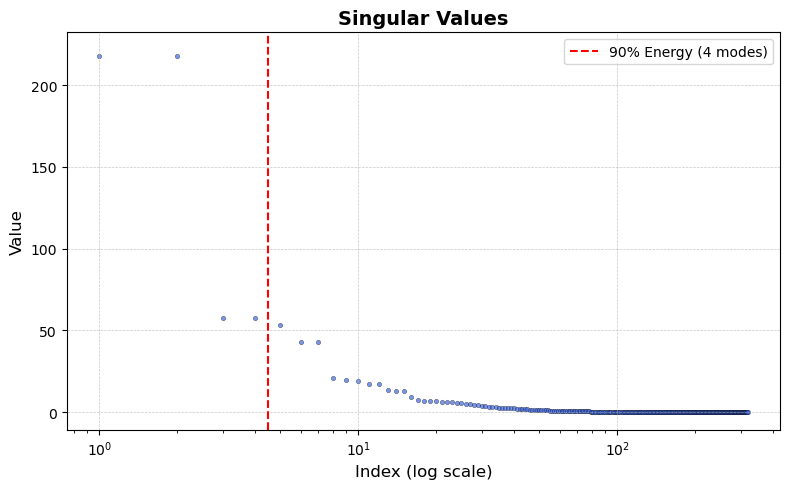

In [51]:
plt.figure(figsize=(8, 5), dpi=100)

plt.scatter(np.arange(len(S)), S, s=10, c='royalblue', alpha=0.7, edgecolors='k', linewidths=0.3)
plt.axvline(x=num_modes + 0.5, color='red', linestyle='--', linewidth=1.5, label=f'90% Energy ({num_modes} modes)')
plt.title('Singular Values', fontsize=14, weight='bold')
plt.xlabel('Index (log scale)', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.xscale('log')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



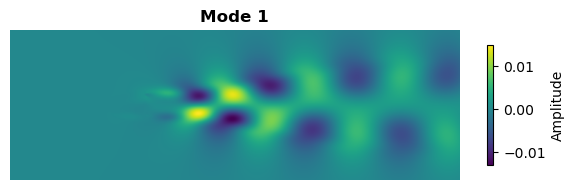

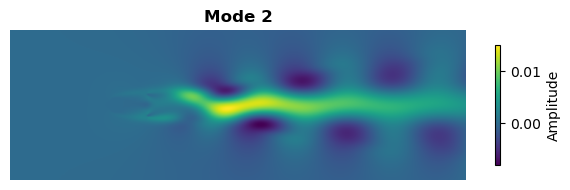

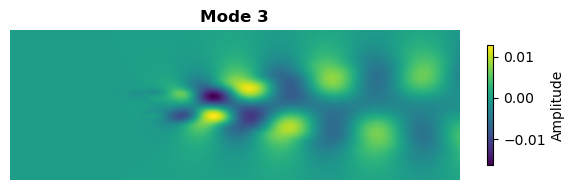

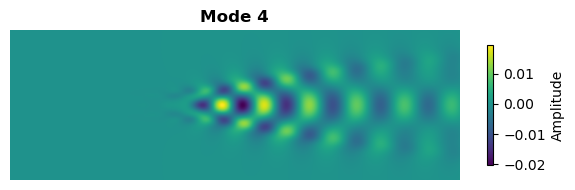

In [54]:
import matplotlib.pyplot as plt

for i in range(num_modes):
    plt.figure(figsize=(6, 2), dpi=100)
    plt.imshow(U[:, i].reshape(H, W), cmap='viridis', aspect='auto')
    
    plt.title(f'Mode {i+1}', fontsize=12, weight='bold')
    plt.axis('off')  # Hide axis for a cleaner image display
    plt.colorbar(shrink=0.8, label='Amplitude')  # Optional: show color scale
    
    plt.tight_layout()
    plt.show()
